In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/full_train.csv")
# val=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/hybrid_validation.csv")
# test=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/hybrid_test.csv")
test=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/full_test.csv")

In [ ]:
print(len(train))
train=train[train["nevents"]>=5]
print(len(train))

83549
78011


In [ ]:
train=train[["product_action_symb",'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',"convert","time_since_last_event"]]
# val=val[["product_action_symb",'nevents', 'weekend', 'part_day', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove',"convert","time_since_last_event",'view_to_add_ratio', 'detail_to_add_ratio',"view_to_remove_ratio","view_to_detail_ratio","detail_to_remove_ratio"]]

In [ ]:
train = pd.get_dummies(train, columns=['part_day'], prefix='part_day')
train.head()
test = pd.get_dummies(test, columns=['part_day'], prefix='part_day')
train.head()
# test2 = pd.get_dummies(test2, columns=['part_day'], prefix='part_day')
# test2.head()

,product_action_symb,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event,page_id_encoded,cum_time,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",18,0,3478.696,5,12,3,0,0,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...","[11024, 11024, 136348, 11244, 241105, 69975, 1...","[0.0, 998.119, 1004.5550000000001, 1026.548, 1...",0,1,0,0
1,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",41,1,2612.011,9,19,4,0,0,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...","[69975, 52124, 153959, 153959, 52124, 52124, 6...","[288.871, 298.224, 298.224, 310.167, 339.061, ...",0,1,0,0
2,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ...",44,0,2692.056,22,11,0,18,1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....","[3970, 3970, 17467, 75308, 75308, 75308, 24051...","[0.0, 44.073, 91.22999999999999, 97.1429999999...",0,0,0,1
3,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]",15,1,391.502,4,3,1,0,0,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...","[61310, 67044, 75476, 46821, 183927, 11434, 44...","[33.984, 108.469, 146.12, 196.62800000000001, ...",0,0,0,1
5,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, ...",50,1,1055.757,12,15,5,0,0,"[4.464, 32.01, 12.684, 18.514, 4.154, 26.004, ...","[69975, 181948, 12143, 181948, 17467, 85883, 2...","[4.464, 36.474, 49.157999999999994, 67.672, 71...",0,1,0,0


In [ ]:
test.describe()

,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,convert,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
count,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000,37125.000000
mean,18.714936,0.289912,634.293349,6.128727,4.948013,1.189279,0.486303,0.228525,0.314640,0.379987,0.049589,0.255785
std,11.569711,0.453728,654.402548,4.352869,2.799247,1.378203,1.424748,0.419888,0.464378,0.485390,0.217098,0.436307
min,6.000000,0.000000,8.268000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,216.149000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,0.000000,415.285000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.000000,805.692000,8.000000,7.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99.000000,1.000000,11221.605000,50.000000,38.000000,10.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train=train[train["nevents"]>=5]
# val=val[val["nevents"]>=5]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
features_to_normalize = ['nevents', 'total_time', 'products_viewed', 'nview', 'ndetail', 'nremove']
scaler = MinMaxScaler()
scaler.fit(train[features_to_normalize])
train[features_to_normalize] = scaler.transform(train[features_to_normalize])
test[features_to_normalize] = scaler.transform(test[features_to_normalize])

In [ ]:
train.head()

,product_action_symb,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event,page_id_encoded,cum_time,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",0.171717,0,0.236488,0.065789,0.134831,0.069767,0.000000,0,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...","[11024, 11024, 136348, 11244, 241105, 69975, 1...","[0.0, 998.119, 1004.5550000000001, 1026.548, 1...",0,1,0,0
1,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",0.404040,1,0.177569,0.118421,0.213483,0.093023,0.000000,0,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...","[69975, 52124, 153959, 153959, 52124, 52124, 6...","[288.871, 298.224, 298.224, 310.167, 339.061, ...",0,1,0,0
2,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ...",0.434343,0,0.183011,0.289474,0.123596,0.000000,0.243243,1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....","[3970, 3970, 17467, 75308, 75308, 75308, 24051...","[0.0, 44.073, 91.22999999999999, 97.1429999999...",0,0,0,1
3,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]",0.141414,1,0.026615,0.052632,0.033708,0.023256,0.000000,0,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...","[61310, 67044, 75476, 46821, 183927, 11434, 44...","[33.984, 108.469, 146.12, 196.62800000000001, ...",0,0,0,1
4,"[2, 1, 3, 1]",0.030303,0,0.006255,0.026316,0.011236,0.000000,0.000000,0,"[0.0, 9.082, 82.927]","[157942, 157942, 136348, 247527]","[0.0, 9.082, 92.00900000000001]",1,0,0,0


In [ ]:
# # Assuming `time_on_pages` is a DataFrame column of lists of tuples (page_id, time_spent)
# page_ids_train = []
# times_spent_train = []
# time_on_pages_train = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train["time_on_pages"]]
# for session in time_on_pages_train:
#     page_ids_train.append([page_id for page_id, _ in session])
#     times_spent_train.append([time for _, time in session])

# page_ids_val = []
# times_spent_val = []
# time_on_pages_val = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_val["time_on_pages"]]
# for session in time_on_pages_val:
#     page_ids_val.append([page_id for page_id, _ in session])
#     times_spent_val.append([time for _, time in session])


In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # train_page_ids = [[tup[0] for tup in seq] for seq in train["time_on_pages"]]
# # train_time_spent = [[tup[1] for tup in seq] for seq in train["time_on_pages"]]
# max_sequence_length=100
# train_page_ids = pad_sequences(page_ids_train, maxlen=max_sequence_length, padding='post')
# train_time_spent = pad_sequences(times_spent_train, maxlen=max_sequence_length, padding='post', dtype='float32')

# val_page_ids = pad_sequences(page_ids_val, maxlen=max_sequence_length, padding='post')
# val_time_spent = pad_sequences(times_spent_val, maxlen=max_sequence_length, padding='post', dtype='float32')
# val_page_ids = pad_sequences(val['page_id_encoded_list'], maxlen=max_sequence_length, padding='post', truncating='post')
# val_time_spent = pad_sequences(val['time_on_pages'], maxlen=max_sequence_length, padding='post', truncating='post', dtype='float')

In [ ]:
len(train_page_ids)

105272

In [ ]:
X_train=train.drop("convert",axis=1)
y_train=train["convert"]
X_test=test.drop("convert",axis=1)
y_test=test["convert"]

In [ ]:
del X_train["view_to_add_ratio"]
del X_train["detail_to_add_ratio"]
del X_train["view_to_remove_ratio"]
del X_train["view_to_detail_ratio"]
del X_train["detail_to_remove_ratio"]
del X_train["weekend"]
del X_val["view_to_add_ratio"]
del X_val["detail_to_add_ratio"]
del X_val["view_to_remove_ratio"]
del X_val["view_to_detail_ratio"]
del X_val["detail_to_remove_ratio"]
del X_val["weekend"]
X_train.head()

,nevents,total_time,products_viewed,nview,ndetail,nremove,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,0.250152,1.772473,1.085123,-0.575359,-0.600685,2.397553,0,0,0,1
1,0.300442,0.187348,0.413405,-0.015829,0.137555,-0.286190,0,0,1,0
2,1.960018,1.034463,1.353811,2.781824,2.598357,-0.286190,0,1,0,0
3,-0.504200,0.739764,-0.930033,0.077426,-0.600685,-0.286190,0,1,0,0
4,-1.057392,-0.894038,-0.795689,-0.855124,-0.600685,-0.286190,1,0,0,0


In [ ]:
X_train

,product_action_symb,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,time_since_last_event,page_id_encoded,cum_time,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",0.171717,0,0.236488,0.065789,0.134831,0.069767,0.000000,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031...","[11024, 11024, 136348, 11244, 241105, 69975, 1...","[0.0, 998.119, 1004.5550000000001, 1026.548, 1...",0,1,0,0
1,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",0.404040,1,0.177569,0.118421,0.213483,0.093023,0.000000,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,...","[69975, 52124, 153959, 153959, 52124, 52124, 6...","[288.871, 298.224, 298.224, 310.167, 339.061, ...",0,1,0,0
2,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ...",0.434343,0,0.183011,0.289474,0.123596,0.000000,0.243243,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4....","[3970, 3970, 17467, 75308, 75308, 75308, 24051...","[0.0, 44.073, 91.22999999999999, 97.1429999999...",0,0,0,1
3,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]",0.141414,1,0.026615,0.052632,0.033708,0.023256,0.000000,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44...","[61310, 67044, 75476, 46821, 183927, 11434, 44...","[33.984, 108.469, 146.12, 196.62800000000001, ...",0,0,0,1
4,"[2, 1, 3, 1]",0.030303,0,0.006255,0.026316,0.011236,0.000000,0.000000,"[0.0, 9.082, 82.927]","[157942, 157942, 136348, 247527]","[0.0, 9.082, 92.00900000000001]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83544,"[1, 1, 1, 2, 3, 2, 1, 1, 4, 3, 4, 1, 1, 1, 1, ...",0.181818,1,0.052207,0.092105,0.101124,0.046512,0.027027,"[18.438, 18.456, 0.0, 121.923, 57.741, 0.0, 15...","[238104, 88248, 230805, 230805, 136348, 51315,...","[18.438, 36.894, 36.894, 158.817, 216.558, 216...",0,0,0,1
83545,"[1, 2, 2, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 1, ...",0.949495,0,0.057905,0.447368,0.629213,0.558140,0.027027,"[0.0, 4.216, 0.0, 6.29, 0.0, 5.448, 42.706, 0....","[31026, 31026, 203213, 203213, 31026, 31026, 2...","[0.0, 4.216, 4.216, 10.506, 10.506, 15.954, 58...",0,0,0,1
83546,"[1, 2, 3, 3, 1, 1, 1]",0.060606,1,0.009254,0.039474,0.033708,0.000000,0.000000,"[0.0, 67.658, 28.399, 6.329, 10.041, 23.7]","[201760, 201760, 136348, 136348, 59156, 59156,...","[0.0, 67.658, 96.057, 102.386, 112.42699999999...",0,1,0,0
83547,"[1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",0.313131,1,0.066765,0.092105,0.269663,0.093023,0.013514,"[10.556000000000001, 85.582, 7.249, 0.0, 6.705...","[123473, 136348, 37750, 101159, 101159, 37750,...","[10.556000000000001, 96.13799999999999, 103.38...",1,0,0,0


In [ ]:
del X_test["page_id_encoded"]
# del X_test["time_on_pages"]
# del X_val["page_id_encoded"]
# del X_val["time_on_pages"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Assuming X_train and y_train are your data and labels
smote = SMOTE(random_state=0)
ros=RandomOverSampler(random_state=69)
# Resample the dataset
X_train, y_train = ros.fit_resample(X_train, y_train)
# X_resampled_series = pd.Series(X_resampled.flatten())
# y_resampled_series = pd.Series(y_resampled)
# Check the new class distribution
print("Class distribution after resampling:", {label: count for label, count in zip(*np.unique(y_train, return_counts=True))})

Class distribution after resampling: {0: 60562, 1: 60562}


In [ ]:
X_train_seq=X_train["product_action_symb"]
X_test_seq=X_test["product_action_symb"]
del X_train["product_action_symb"]
del X_test["product_action_symb"]

In [ ]:
X_train_seq2=X_train["time_since_last_event"]
X_test_seq2=X_test["time_since_last_event"]
del X_train["time_since_last_event"]
del X_test["time_since_last_event"]
# del X_train["time_since_last_event_normalized"]
# del X_val["time_since_last_event_normalized"]

In [ ]:
X_train_seq3=X_train["cum_time"]
X_test_seq3=X_test["cum_time"]
del X_train["cum_time"]
del X_test["cum_time"]

In [ ]:
X_train_seq4=X_train["page_id_encoded"]
X_test_seq4=X_test["page_id_encoded"]
del X_train["page_id_encoded"]
del X_test["page_id_encoded"]

In [ ]:
# X_train_seq3=X_train["page_id_encoded"]
# X_test_seq3=X_test["page_id_encoded"]
# del X_train["page_id_encoded"]
del X_test["page_id_encoded"]

In [ ]:
import numpy as np
import ast

def normalize_lists_within_list(data):
    normalized_data = []
    for sublist_str in data:
        # Convert string representation of list to actual list
        sublist = ast.literal_eval(sublist_str)
        sublist_np = np.array(sublist)
        normalized_sublist = (sublist_np - np.mean(sublist_np)) / np.std(sublist_np)
        normalized_data.append(normalized_sublist.tolist())
    return normalized_data

# Assuming X_train_seq2 is your list containing string representations of lists of time values
X_train_seq2 = normalize_lists_within_list(X_train_seq2)
X_train_seq4 = normalize_lists_within_list(X_train_seq4)
X_test_seq2 = normalize_lists_within_list(X_test_seq2)
X_test_seq4 = normalize_lists_within_list(X_test_seq4)
# Assuming your data is stored in a variable named 'data'
# X_train_seq2 = normalize_within_lists(X_train_seq2)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-17-2fb73ac113ce>:10: RuntimeWarning: invalid value encountered in divide
  normalized_sublist = (sublist_np - np.mean(sublist_np)) / np.std(subli

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert the string representation of the lists into actual lists of integers
X_train_seq = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train_seq]
X_test_seq = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_test_seq]
# Assuming X_train is your NumPy array of lists
X_train_padded = pad_sequences(X_train_seq, maxlen=100,padding='post', dtype='int32')
X_test_padded= pad_sequences(X_test_seq, maxlen=100,padding='post', dtype='int32')
# Reshape for RNN input
X_train_series = np.reshape(X_train_padded, (X_train_padded.shape[0], X_train_padded.shape[1], 1))
X_test_series = np.reshape(X_test_padded, (X_test_padded.shape[0], X_test_padded.shape[1], 1))
# Print the shape
print('Train set shape:', X_train_series.shape)
print('Val set shape:', X_test_series.shape)

Train set shape: (121124, 100, 1)
Val set shape: (37125, 100, 1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert the string representation of the lists into actual lists of integers
X_train_seq3 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train_seq3]
X_test_seq3 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_test_seq3]
# Assuming X_train is your NumPy array of lists
# X_train_seq3 = [[0 if np.isnan(val) else val for val in seq] for seq in X_train_seq3]
# X_test_seq3 = [[0 if np.isnan(val) else val for val in seq] for seq in X_test_seq3]

X_train_padded3 = pad_sequences(X_train_seq3, maxlen=100,padding='post', dtype='int32')
X_test_padded3= pad_sequences(X_test_seq3, maxlen=100,padding='post', dtype='int32')
# Reshape for RNN input
X_train_series3 = np.reshape(X_train_padded3, (X_train_padded3.shape[0], X_train_padded3.shape[1], 1))
X_test_series3 = np.reshape(X_test_padded3, (X_test_padded3.shape[0], X_test_padded3.shape[1], 1))
# Print the shape
print('Train set shape:', X_train_series3.shape)
print('Val set shape:', X_test_series3.shape)

Train set shape: (121124, 100, 1)
Val set shape: (37125, 100, 1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert the string representation of the lists into actual lists of integers
X_train_seq4 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train_seq4]
X_test_seq4 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_test_seq4]
# Assuming X_train is your NumPy array of lists
X_train_padded4 = pad_sequences(X_train_seq4, maxlen=100,padding='post', dtype='int32')
X_test_padded4= pad_sequences(X_test_seq4, maxlen=100,padding='post', dtype='int32')
# Reshape for RNN input
X_train_series4 = np.reshape(X_train_padded4, (X_train_padded4.shape[0], X_train_padded4.shape[1], 1))
X_test_series4 = np.reshape(X_test_padded4, (X_test_padded4.shape[0], X_test_padded4.shape[1], 1))
# Print the shape
print('Train set shape:', X_train_series4.shape)
print('Val set shape:', X_test_series4.shape)

Train set shape: (121124, 100, 1)
Val set shape: (37125, 100, 1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert the string representation of the lists into actual lists of integers

# Assuming X_train_seq2 and X_test_seq2 are your lists of sequences
X_train_seq2 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train_seq2]
X_test_seq2 = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_test_seq2]

# Replace NaN values with zeros in your sequences
# X_train_seq2 = [[0 if np.isnan(val) else val for val in seq] for seq in X_train_seq2]
# X_test_seq2 = [[0 if np.isnan(val) else val for val in seq] for seq in X_test_seq2]

# Padding sequences
X_train_padded2 = pad_sequences(X_train_seq2, maxlen=100, padding='post', dtype='int32')
X_test_padded2 = pad_sequences(X_test_seq2, maxlen=100, padding='post', dtype='int32')

# Reshape for RNN input
X_train_series2 = np.reshape(X_train_padded2, (X_train_padded2.shape[0], X_train_padded2.shape[1], 1))
X_test_series2 = np.reshape(X_test_padded2, (X_test_padded2.shape[0], X_test_padded2.shape[1], 1))
# Print the shape
print('Train set shape:', X_train_series2.shape)
print('Val set shape:', X_test_series2.shape)

Train set shape: (121124, 100, 1)
Val set shape: (37125, 100, 1)


In [ ]:
import numpy as np

# Assuming feature1, feature2, feature3, and feature4 are your features
# with shapes (131614, 100, 1) and (37125, 100, 1) for train and test sets respectively

# Concatenate train features
train_combined = np.concatenate((X_train_series,X_train_series2,X_train_series4), axis=-1)

# Concatenate test features
test_combined = np.concatenate((X_test_series,X_test_series2,X_test_series4), axis=-1)

# Now, train_combined and test_combined have shapes (131614, 100, 4) and (37125, 100, 4) respectively


In [ ]:
test_combined[1]

array([[    1, 10003,    34],
       [    1,  2936,     9],
       [    1, 19819,    17],
       [    1, 22459,     0],
       [    2, 22459,    94],
       [    3, 19521,     4],
       [    4,  1644,     1],
       [    1,  1644,     1],
       [    2, 22459,     0],
       [    1, 22459,     1],
       [    1,  2489,     6],
       [    1, 13686,    37],
       [    4,  8492,     0],
       [    4,  8492,     0],
       [    4,  8492,     0],
       [    1,  8492,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [    0,     0,     0],
       [  

In [ ]:
del X_test["session_id_hash"]
del X_test["event_type"]
del X_test["product_action"]
del X_test["product_sku_hash"]
del X_test["server_timestamp_epoch_ms"]
del X_test["datetime"]
del X_test["addcart"]
del X_test["the_last_time"]
del X_test["day_of_week"]
del X_test["hour"]
X_test.head()

,nevents,weekend,total_time,products_viewed,nview,ndetail,nremove,part_day_afternoon,part_day_evening,part_day_morning,part_day_night
0,0.294737,0,0.016838,0.197368,0.067416,0.093023,0.000000,1,0,0,0
1,0.115789,0,0.014226,0.092105,0.056180,0.023256,0.054054,1,0,0,0
2,0.273684,0,0.026322,0.131579,0.078652,0.046512,0.000000,0,1,0,0
3,0.084211,0,0.014208,0.092105,0.056180,0.046512,0.027027,0,0,0,1
4,0.126316,0,0.031223,0.052632,0.112360,0.000000,0.000000,0,1,0,0


In [ ]:
del X_train["part_day_morning"]
del X_test["part_day_morning"]
del X_train["part_day_night"]
del X_test["part_day_night"]


In [ ]:
X_train_series2[0]

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, concatenate,Dropout,Masking,Bidirectional, GRU,Embedding
from tensorflow.keras.models import Model
from keras.layers import Reshape
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.regularizers import l2
import tensorflow as tf
l2_reg = 0.001
# Number of features in the non-sequential data
non_sequential_feature_count = X_train.shape[1]  # replace with your actual feature count
# Maximum sequence length (you can use padding to ensure all sequences are the same length)
max_sequence_length = 100  # replace with your actual maximum sequence length
# Dimensionality of the LSTM or GRU outputs
# lstm_units = 50

# Sequential data input (e.g., the product_action_symb sequences)
sequential_input = Input(shape=(max_sequence_length,1), name='sequential_input')
# LSTM for sequential pathway

masked_input = Masking(mask_value=0)(sequential_input)
lstm_out_1 =(LSTM(units=128, activation='tanh', return_sequences=True,kernel_regularizer=l2(l2_reg)))(masked_input)
lstm_out_dropout_1 = Dropout(0.3)(lstm_out_1)
lstm_out_2 =(LSTM(units=64, activation='tanh',kernel_regularizer=l2(l2_reg)))(lstm_out_dropout_1)
lstm_out_dropout_2 = Dropout(0.3)(lstm_out_2)

sequential_input2 = Input(shape=(max_sequence_length, 1), name='sequential_input2')
embedding_size = 128  # Adjust the size of the embedding vectors as needed
embedding_layer = Embedding(input_dim=100000, output_dim=embedding_size)(sequential_input2)
reshaped_embedding = Reshape((max_sequence_length, embedding_size))(embedding_layer)
# masked_input2 = Masking(mask_value=0)(embedding_layer)
lstm_out_3 = (LSTM(units=128, activation='tanh', return_sequences=True, kernel_regularizer=l2(l2_reg)))(reshaped_embedding)
lstm_out_dropout_3 = Dropout(0.3)(lstm_out_3)
lstm_out_4 = (LSTM(units=64, activation='tanh', kernel_regularizer=l2(l2_reg)))(lstm_out_dropout_3)
lstm_out_dropout_4 = Dropout(0.3)(lstm_out_4)


# # Inputs
# sequential_input = Input(shape=(max_sequence_length, 2), name='sequential_input')
# sequential_input2 = Input(shape=(max_sequence_length,1), name='sequential_input2')  # Only for the categorical feature

# # Embedding for the categorical feature
# embedding_size = 512  # Adjust the size of the embedding vectors as needed
# embedding_layer = Embedding(input_dim=264716, output_dim=embedding_size)(sequential_input2)
# # Note: No need for Reshape layer here as Embedding outputs the required shape.

# # Masking for the numerical data
# masked_input = Masking(mask_value=0)(sequential_input)
# masked_input2 = Masking(mask_value=0)(sequential_input2)
# # Concatenate the masked numerical data and the embeddings
# concatenated = concatenate([masked_input, masked_input2], axis=-1)

# # LSTM layers
# lstm_out_1 = LSTM(units=128, activation='tanh', return_sequences=True, kernel_regularizer=l2(l2_reg))(concatenated)
# lstm_out_dropout_1 = Dropout(0.3)(lstm_out_1)
# lstm_out_2 = LSTM(units=64, activation='tanh', kernel_regularizer=l2(l2_reg))(lstm_out_dropout_1)
# lstm_out_dropout_2 = Dropout(0.3)(lstm_out_2)

# sequential_input3 = Input(shape=(max_sequence_length, 1), name='sequential_input3')
# masked_input3 = Masking(mask_value=0)(sequential_input3)
# # embedding_layer2 = Embedding(input_dim=100000, output_dim=embedding_size)(sequential_input3)
# # reshaped_embedding2 = Reshape((-1, embedding_size))(embedding_layer2)
# lstm_out_5 = (LSTM(units=128, activation='tanh', return_sequences=True, kernel_regularizer=l2(l2_reg)))(masked_input3)
# lstm_out_dropout_5 = Dropout(0.3)(lstm_out_5)
# lstm_out_6 = (LSTM(units=64, activation='tanh', kernel_regularizer=l2(l2_reg)))(lstm_out_dropout_5)
# lstm_out_dropout_6 = Dropout(0.3)(lstm_out_6)
# # # # Non-sequential data input
# non_sequential_input = Input(shape=(non_sequential_feature_count,), name='non_sequential_input')
# # # Dense layer for non-sequential pathway
# dense_out = Dense(128, activation='relu')(non_sequential_input)

# Concatenate the outputs of the two pathways
concatenated = concatenate([lstm_out_dropout_2,lstm_out_dropout_4])
# Add more layers as needed after concatenation
x = Dense(256, activation='relu')(concatenated)
x = Dense(128, activation='relu')(x)

# Output layer for binary classification
output = Dense(1, activation='sigmoid', name='output')(x)

# Build the model
model = Model(inputs=[sequential_input,sequential_input2], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks=[EarlyStopping(monitor="val_accuracy",patience=2,restore_best_weights=True)]
# Train the model (make sure to preprocess your data to match this input structure)
model.fit([X_train_series,X_train_series2], y_train, validation_data=([X_test_series,X_test_series2],y_test),epochs=5, batch_size=256,verbose=1,callbacks=callbacks)

# Here:
# - X_train_sequential is a 2D numpy array where each row is a sequence of actions
# - X_train_non_sequential is a 2D numpy array where each row represents the non-sequential features
# - y_train is the target variable

# test["y_pred"]=y_pred

Epoch 1/2
474/474 [==============================] - 259s 504ms/step - loss: 0.5175 - accuracy: 0.8566 - val_loss: 0.9020 - val_accuracy: 0.7487
Epoch 2/2
474/474 [==============================] - 233s 491ms/step - loss: 0.3197 - accuracy: 0.8835 - val_loss: 0.9974 - val_accuracy: 0.7795


1161/1161 [==============================] - 95s 77ms/step
Confusion Matrix:
[[26034  2607]
 [ 5579  2905]]


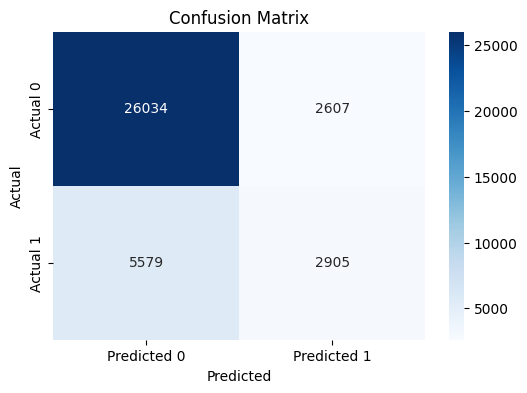

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     28641
           1       0.53      0.34      0.42      8484

    accuracy                           0.78     37125
   macro avg       0.68      0.63      0.64     37125
weighted avg       0.76      0.78      0.76     37125



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict([X_test_series,X_test_series2,X_test])
# y_pred = model.predict([X_train_series,X_train_series4,X_train_series2,X_train])
y_pred_final = np.where(y_pred >= 0.5, 1, 0)
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_final)
# conf_mat = confusion_matrix(y_train, y_pred_final)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_pred_final))
# print(classification_report(y_train,y_pred_final))

In [ ]:
X_train["product_action_symb"] = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train["product_action_symb"]]
X_train["time_since_last_event"] = [ast.literal_eval(x) if isinstance(x, str) else x for x in X_train["time_since_last_event"]]

In [ ]:
from xgboost import XGBClassifier
from keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
import ast

xgb_c = XGBClassifier(use_label_encoder=False, eval_metric='logloss',enable_categorical=True)
xgb_c.fit(X_train, y_train)
xgb_pred = xgb_c.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78     28641
           1       0.39      0.65      0.49      8484

    accuracy                           0.69     37125
   macro avg       0.63      0.68      0.63     37125
weighted avg       0.76      0.69      0.71     37125



In [ ]:
from sklearn.metrics import accuracy_score

# Suppose lstm_preds are the predictions from the LSTM on the test set
# and xgb_preds are the predictions from XGBoost on the test set

# Averaging
# combined_preds = (y_pred + xgb_pred) / 2
y_pred_final = np.where(combined_preds >= 0.5, 1, 0)
# Evaluate the ensemble
# ensemble_accuracy = accuracy_score(y_test, combined_preds.round())
# print(f'Ensemble accuracy: {ensemble_accuracy}')
print(classification_report(y_test, y_pred_final))


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBClassifier
xgb_c = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_c, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Use the best estimator for prediction
best_estimator = grid_search.best_estimator_
xgb_pred = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, xgb_pred))


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy found:  0.7669852786172607
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     28641
           1       0.39      0.64      0.49      8484

    accuracy                           0.69     37125
   macro avg       0.63      0.68      0.63     37125
weighted avg       0.76      0.69      0.71     37125



Confusion Matrix:
[[28484   157]
 [ 8291   193]]


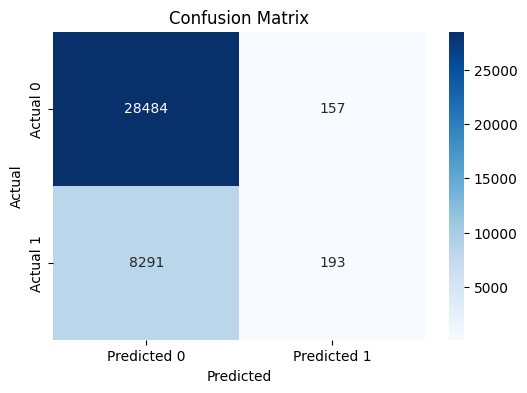

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# y_pred_final = np.where(y_pred >= 0.55, 1, 0)
# Create confusion matrix
conf_mat = confusion_matrix(y_test, xgb_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

# Assuming lstm_preds and xgb_preds are the predictions from LSTM and XGBoost models
ensemble_preds = (y_pred + xgb_pred) / 2  # Simple averaging
print(classification_report(ensemble_preds, y_test))
# Use ensemble_preds for evaluation or further processing


In [ ]:
del X_test["y_pred"]

In [ ]:
y_train.describe()

count    131614.000000
mean          0.500000
std           0.500002
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: convert, dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels, respectively
# Replace them with the actual arrays or lists from your model
y_pred = model.predict([X_val_series,X_val_series2,X_val])
y_pred = np.where(y_pred >= 0.5, 1, 0)
# Create confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 43/488 [=>............................] - ETA: 48s

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     13171
           1       0.55      0.62      0.58      3539

    accuracy                           0.81     16710
   macro avg       0.72      0.74      0.73     16710
weighted avg       0.82      0.81      0.82     16710

